# Singapore Housing Data Set Challenge

In [1]:
import os
import pandas as pd
import numpy as np
os.chdir(r"C:\Holmusk")

In [2]:
dt_1990_1999 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
dt_2000_feb_2012 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
dt_march_2012_dec_2014 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
dt_jan_2015_dec_2016 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
dt_jan_2017_onwards = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

## We combine data from 1990 to dec-2014 for the analysis

In [3]:
dt_1990_2014 = pd.concat([dt_1990_1999, dt_2000_feb_2012, dt_march_2012_dec_2014], axis=0).reset_index(drop=True)
dt_1990_2014['flat_model'] = dt_1990_2014['flat_model'].str.title()
dt_1990_2014['flat_type'] = dt_1990_2014['flat_type'].apply(lambda x: 'MULTI-GENERATION' if x=='MULTI GENERATION' else x)

In [4]:
dt_1990_2014.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0


## resale price descriptive statistics

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline

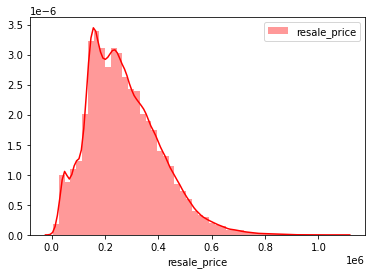

In [6]:
sn.distplot(dt_1990_2014.resale_price, color = 'r', label = 'resale_price');
plt.legend(); 

<Figure size 720x1440 with 0 Axes>

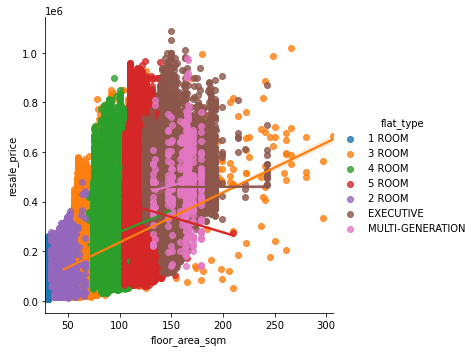

In [7]:
plt.figure(figsize=(10,20))
sn.lmplot(x="floor_area_sqm", y="resale_price", hue="flat_type", data=dt_1990_2014)

## Town descriptive statistics
## We have grouped the cities into three groups 'town_A', 'town_B' and 'town_C'
## Depending on the average resale price of each city we have group them
## 250001  and above - town_A
## 200001 to 250000 - town_B
## 0 to 200000 - town_C
 


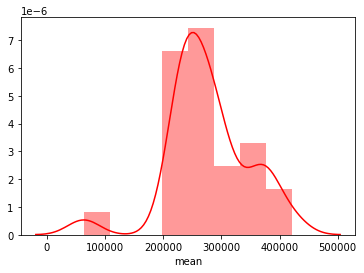

In [8]:
#dt_1990_2014.groupby(['town']).resale_price.agg(['count','mean']).sort_values('mean')['mean']
sn.distplot(dt_1990_2014.groupby(['town']).resale_price.agg(['count','mean']).sort_values('mean')['mean'], color = 'r', label = 'Average_resale_town');

In [9]:
A = dt_1990_2014.groupby(['town']).resale_price.agg(['count','mean']).sort_values('mean').reset_index()

In [10]:
town_updated = pd.merge(dt_1990_2014['town'],A, how='left', on = 'town')['mean'].apply(lambda x: 'town_A' if x > 250000
                                                                                               else('town_B' if x  > 200000
                                                                                                    else('town_C')))

In [11]:
town_resale_price = pd.concat([dt_1990_2014['resale_price'],town_updated], axis =1).rename(columns={'mean' : 'town'})

## ANOVA test for categorical variable town

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('resale_price ~ town', data = town_resale_price).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq        df            F  PR(>F)
town      6.458162e+14       2.0  18785.89309     0.0
Residual  1.218778e+16  709051.0          NaN     NaN


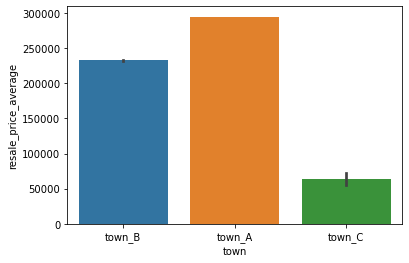

In [13]:
sn.barplot( x= 'town', y = 'resale_price', data= town_resale_price);
plt.ylabel( "resale_price_average" ); 
#plt.xticks(rotation = 90);

## flat_type descriptive statistics

In [14]:
dt_1990_2014['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [15]:
flat_type_update = dt_1990_2014['flat_type'].apply(lambda x: 1 if x == '1 ROOM'
                                else(2 if x == '2 ROOM'
                                     else(3 if x == '3 ROOM'
                                       else(4 if x == '4 ROOM'
                                           else(5 if x == '5 ROOM'
                                               else(6 if x == 'EXECUTIVE'
                                                   else(7 )))))))

In [16]:
H = pd.concat([dt_1990_2014.resale_price,flat_type_update], axis =1).groupby('flat_type').resale_price.mean().reset_index()

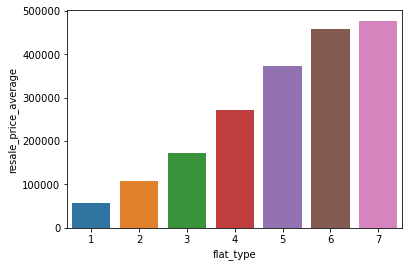

In [17]:
sn.barplot( x= 'flat_type', y = 'resale_price', data=H);
plt.ylabel( "resale_price_average" ); 
#plt.xticks(rotation = 90);

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('resale_price ~ flat_type', data = H).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                 sum_sq   df           F    PR(>F)
flat_type  1.667540e+11  1.0  259.424106  0.000017
Residual   3.213927e+09  5.0         NaN       NaN


## street

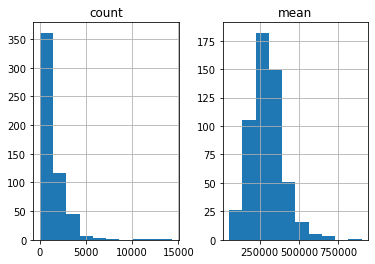

In [19]:
dt_1990_2014.groupby(['street_name']).resale_price.agg(['count','mean']).sort_values('mean').hist();

## Cheacking the distribution storey_range and group it into wider groups

In [20]:
import warnings 
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline

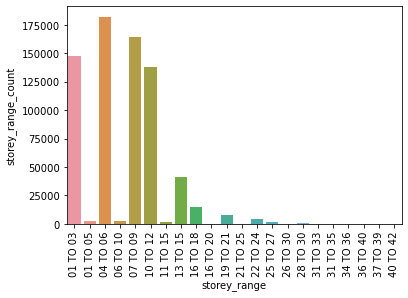

In [21]:
A = pd.DataFrame(dt_1990_2014['storey_range'].value_counts().reset_index()).rename(columns = {'index' : 'storey_range', 'storey_range':'storey_range_count'}).sort_values(['storey_range'])

#plt.figure(figsize = (8,6));
sn.barplot(x = 'storey_range' , y= 'storey_range_count', data = A);
plt.xticks(rotation = 90);

In [22]:
storey_range_average = dt_1990_2014['storey_range'].apply(lambda x: np.round(( int(x.split(' ')[0]) + int(x.split(' ')[2]) )/2,0) )
C = pd.concat([storey_range_average, dt_1990_2014.resale_price], axis =1)

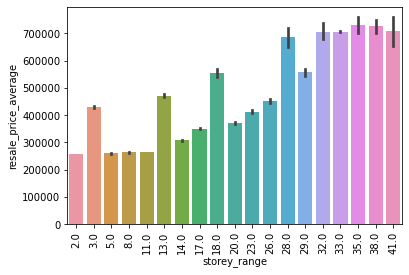

In [23]:
sn.barplot( x= 'storey_range', y = 'resale_price', data = C)
plt.ylabel('resale_price_average')
plt.xticks(rotation = 90);

## floor area sqm descriptive statistics

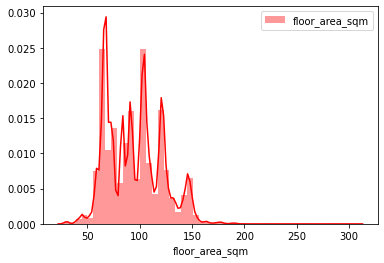

In [24]:
sn.distplot(dt_1990_2014['floor_area_sqm'], color = 'r', label = 'floor_area_sqm');
plt.legend(); 

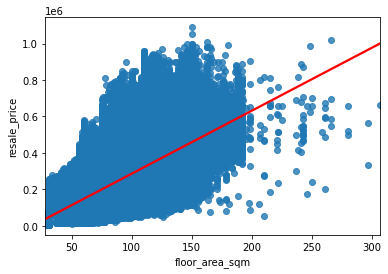

In [25]:
import numpy as np
sn.regplot( x = dt_1990_2014['floor_area_sqm'], y = dt_1990_2014['resale_price'],  data = dt_1990_2014 , line_kws={"color": "red"});

## flat_model descriptive statistics

In [26]:
D = dt_1990_2014.groupby('flat_model').resale_price.agg(['mean', 'count']).sort_values('mean').reset_index()

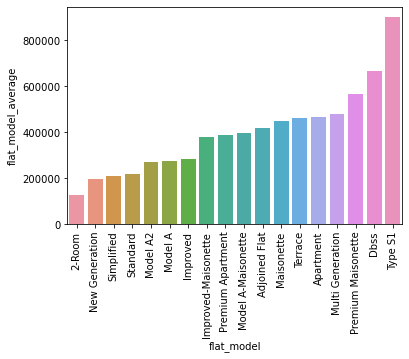

In [27]:
sn.barplot( x= 'flat_model', y = 'mean', data = D)
plt.ylabel('flat_model_average')
plt.xticks(rotation = 90);

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('resale_price ~ flat_type', data = dt_1990_2014).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                 sum_sq        df              F  PR(>F)
flat_type  6.060129e+15       6.0  105729.142233     0.0
Residual   6.773466e+15  709047.0            NaN     NaN


## Categorical Variable converted to dummy variable

In [29]:
categorical_variables = pd.concat([town_updated, dt_1990_2014['flat_model'] ] , axis =1) 
categorical_variables_dummies= pd.get_dummies(categorical_variables, drop_first =True)

## Concatenating dummy variable and continues variables

In [30]:
dt_1990_2014_final = pd.concat([categorical_variables_dummies,dt_1990_2014[['floor_area_sqm','resale_price']],flat_type_update,storey_range_average], axis =1)

## Saperating independent and dependent variables

In [31]:
X = pd.DataFrame(dt_1990_2014_final.drop('resale_price', axis = 1))
Y = pd.DataFrame(dt_1990_2014_final['resale_price'])

In [32]:
import warnings 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( X , Y, train_size = 0.70, random_state = 100 )

## Outlire treatment

In [33]:
Traning_Data = pd.merge(train_X, train_y, left_index =True , right_index = True)

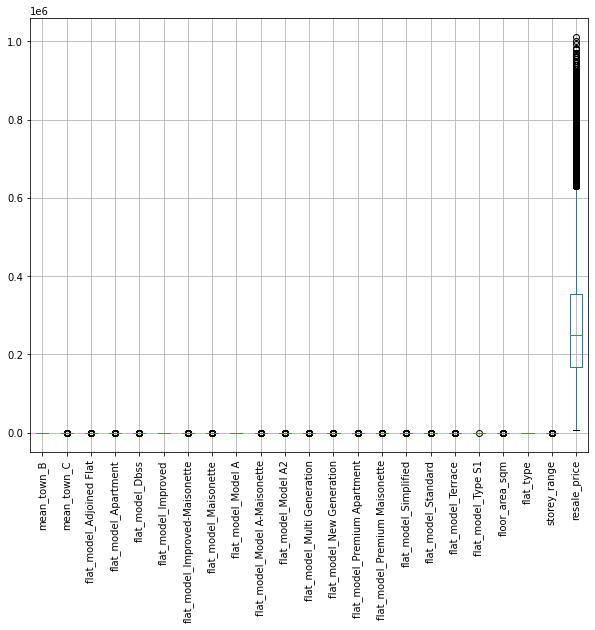

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
Traning_Data.boxplot();
plt.xticks(rotation = 90);

In [35]:
import matplotlib.pyplot as plt
import warnings 
from scipy.stats import zscore


Traning_Data['Z-score_for_resale_price'] = zscore(Traning_Data.resale_price)

In [36]:
outlire = Traning_Data[(Traning_Data['Z-score_for_resale_price'] > 3.0) | (Traning_Data['Z-score_for_resale_price'] < -3.0)]

In [37]:
Traning_Data_outlire_free = Traning_Data.drop(labels = list(outlire.index), axis =0)

In [38]:
train_X_new = pd.DataFrame(Traning_Data_outlire_free.drop(['resale_price','Z-score_for_resale_price','flat_model_Type S1'], axis = 1))
train_y_new = pd.DataFrame(Traning_Data_outlire_free['resale_price'])

## Regress each independent variable on dependent variable to understand their relationship

In [39]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

Varible = list()
rsquared = list()
rsquared_adj = list()
Coef = list()
std_Coef = list()
tvalues = list()
pvalues = list()
aic = list()
for i in train_X_new.columns: 
    lm = sm.OLS( train_y_new, sm.add_constant(train_X_new[i])).fit()
    Varible.append(i)
    rsquared.append(lm.rsquared)
    rsquared_adj.append(lm.rsquared_adj)
    Coef.append(lm.params.values)
    std_Coef.append(lm.params.values *(np.std(train_X_new[i])/np.std(train_y_new)).values )
    tvalues.append(lm.tvalues.values)
    pvalues.append(lm.pvalues.values)
    aic.append(lm.aic)
all_variable = pd.DataFrame(list(zip(Varible, rsquared, rsquared_adj, Coef, std_Coef, tvalues, pvalues, aic)), columns = ['Varible', 'rsquared', 'rsquared_adj', 'Coef', 'std_Coef', 'tvalues', 'pvalues', 'aic'] )


all_variable.sort_values('rsquared_adj', ascending = False)

,Varible,rsquared,rsquared_adj,Coef,std_Coef,tvalues,pvalues,aic
19,flat_type,0.478991,0.478990,"[-105074.11001640264, 93409.07837792886]","[-0.778521342306265, 0.6920920964357837]","[-185.4277873995552, 672.9311035452137]","[0.0, 0.0]",1.266311e+07
18,floor_area_sqm,0.466274,0.466273,"[-51702.34727904388, 3343.083279411494]","[-10.560484763216483, 0.6828428861042951]","[-102.98345928613553, 655.9804622635348]","[0.0, 0.0]",1.267499e+07
12,flat_model_New Generation,0.085327,0.085325,"[286142.1483952552, -89242.39373284114]","[0.9365982621826435, -0.2921075114307915]","[1438.8825165475562, -214.35759541612862]","[0.0, 0.0]",1.294032e+07
3,flat_model_Apartment,0.084590,0.084588,"[258423.51483974536, 196359.13314566851]","[0.38277226460772334, 0.2908436181482403]","[1450.5961493180437, 213.3442018684501]","[0.0, 0.0]",1.294072e+07
7,flat_model_Maisonette,0.058799,0.058797,"[260138.84537442887, 176965.13307705513]","[0.3564533308342485, 0.24248516608908946]","[1444.2525873778482, 175.41758525085822]","[0.0, 0.0]",1.295441e+07
0,mean_town_B,0.053936,0.053934,"[290093.9727679111, -60777.176040786966]","[1.1085058956295024, -0.23224149512001466]","[1264.593366994708, -167.57480220681705]","[0.0, 0.0]",1.295694e+07
13,flat_model_Premium Apartment,0.028471,0.028469,"[261810.70646254582, 121865.67876788336]","[0.3624999235510521, 0.16873373833233432]","[1430.1541988521542, 120.14430519840934]","[0.0, 0.0]",1.297003e+07
20,storey_range,0.018095,0.018093,"[236620.14761376963, 3965.4483571137475]","[8.026738396287854, 0.13451777842052723]","[665.4322077932783, 95.27393157287237]","[0.0, 0.0]",1.297526e+07
15,flat_model_Simplified,0.015366,0.015364,"[270112.85235861014, -62629.50358207928]","[0.5346273981458203, -0.1239609602241278]","[1437.6563141984916, -87.67519037474598]","[0.0, 0.0]",1.297663e+07
16,flat_model_Standard,0.010234,0.010232,"[268784.1362555675, -59003.33381699155]","[0.46083959809726477, -0.10116323463661228]","[1440.8038964347083, -71.36504946318624]","[0.0, 0.0]",1.297919e+07


## correlation matrix 

In [40]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [41]:
corr_matrix = dt_1990_2014_final.corr()
corr_matrix['resale_price'].sort_values().reset_index().rename(columns = {'index' : 'All_Variables'})

,All_Variables,resale_price
0,flat_model_New Generation,-0.292270
1,mean_town_B,-0.223736
2,flat_model_Simplified,-0.125024
3,flat_model_Standard,-0.090252
4,mean_town_C,-0.014538
5,flat_model_Model A2,0.000056
6,flat_model_Type S1,0.005565
7,flat_model_Improved-Maisonette,0.009536
8,flat_model_Premium Maisonette,0.021982
9,flat_model_Model A,0.028283


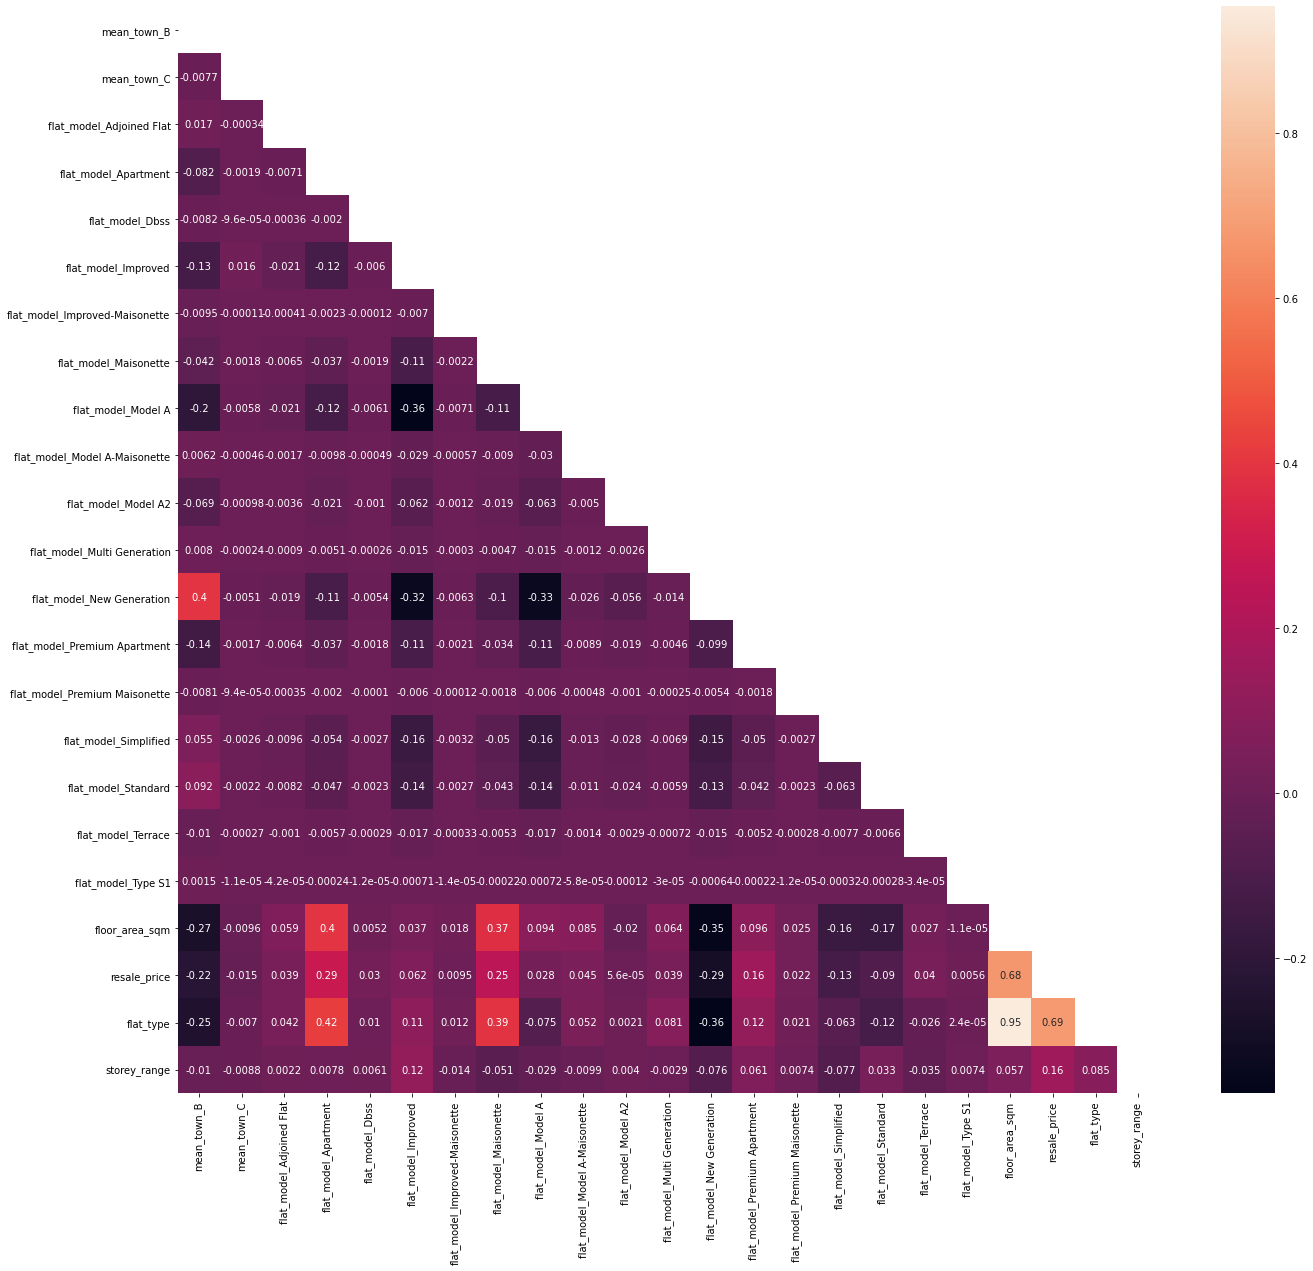

In [42]:
matrix = np.triu(dt_1990_2014_final.corr())
corr_matrix = dt_1990_2014_final.corr()
plt.figure( figsize=(22,20)); 
sn.heatmap(corr_matrix,annot = True,  mask=matrix);
plt.show();

## Multicollinearity 

In [43]:
train_X_new_updated = train_X_new.drop(['flat_type','floor_area_sqm','flat_model_New Generation'], axis=1) #[['flat_model_Model A', 'flat_model_Premium Apartment', 'flat_type']]

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def get_vif_factors( X ):    
    X_matrix = X.values  
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]    
    vif_factors = pd.DataFrame()    
    vif_factors['column'] = X.columns    
    vif_factors['vif'] = vif    
    return vif_factors

vif_factors = get_vif_factors(train_X_new_updated) 

vif_factors

,column,vif
0,mean_town_B,1.488048
1,mean_town_C,1.000465
2,flat_model_Adjoined Flat,1.002763
3,flat_model_Apartment,1.075626
4,flat_model_Dbss,1.000104
5,flat_model_Improved,1.629522
6,flat_model_Improved-Maisonette,1.000022
7,flat_model_Maisonette,1.041309
8,flat_model_Model A,1.482124
9,flat_model_Model A-Maisonette,1.003637


In [45]:
import statsmodels.api as sm
lm1 = sm.OLS(train_y_new, sm.add_constant(train_X_new_updated)).fit()

In [46]:
print(lm1.summary2())

                                Results: Ordinary least squares
Model:                        OLS                      Adj. R-squared:             0.283        
Dependent Variable:           resale_price             AIC:                        12820627.7246
Date:                         2021-04-01 03:00         BIC:                        12820838.7646
No. Observations:             492561                   Log-Likelihood:             -6.4103e+06  
Df Model:                     18                       F-statistic:                1.078e+04    
Df Residuals:                 492542                   Prob (F-statistic):         0.00         
R-squared:                    0.283                    Scale:                      1.1791e+10   
------------------------------------------------------------------------------------------------
                                  Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
---------------------------------------------------------------

## Creating a final model lm2 using step forward regression 
## We have also taken a squar root transformation of the dependent variable

In [47]:
import statsmodels.api as sm
lm2 = sm.OLS(np.power(train_y_new,(1/2)), np.power(sm.add_constant(train_X_new[['flat_model_Model A', 'flat_model_Premium Apartment', 'flat_type']]),(1))).fit()

In [48]:
print(lm2.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.491       
Dependent Variable:      resale_price        AIC:                   5850691.6884
Date:                    2021-04-01 03:00    BIC:                   5850736.1179
No. Observations:        492561              Log-Likelihood:        -2.9253e+06 
Df Model:                3                   F-statistic:           1.587e+05   
Df Residuals:            492557              Prob (F-statistic):    0.00        
R-squared:               0.492               Scale:                 8435.6      
--------------------------------------------------------------------------------
                              Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------------------
const                        119.6739   0.5756 207.9216 0.0000 118.5458 120.8020
flat_model_Model A            36.0111   0.2972 121.18

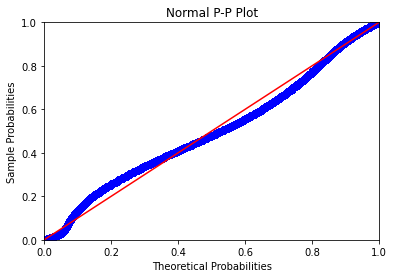

In [49]:
def draw_pp_plot( model, title ):    
    probplot = sm.ProbPlot( model.resid, fit= True );    
   # plt.figure( figsize = (6, 6) );    
    probplot.ppplot( line='45' );    
    plt.title( title );    
    plt.show(); 
    
    
draw_pp_plot( lm2,  "Normal P-P Plot" ); 

In [50]:
def get_standardized_values( vals ):       
    return (vals - vals.mean())/vals.std()

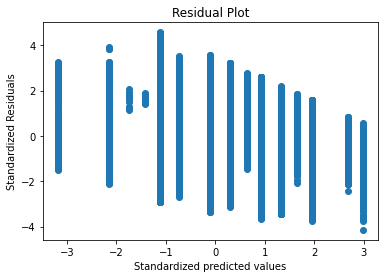

In [51]:
plt.scatter( get_standardized_values( lm2.fittedvalues ), get_standardized_values( lm2.resid ) ) 
plt.title( "Residual Plot" ); 
plt.xlabel( "Standardized predicted values") 
plt.ylabel( "Standardized Residuals"); 
#plt.xlim(-5,5)
#plt.ylim(-5,5)

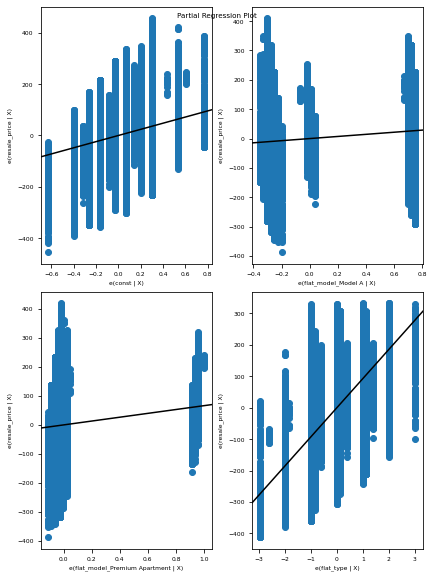

In [52]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.rc("figure", figsize=(6,8))
plt.rc("font", size=6)

fig = sm.graphics.plot_partregress_grid(lm2)
fig.tight_layout(pad=1.0)

# END